In [1]:
import numpy as np 
import cv2
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive',force_remount= True)

Mounted at /content/drive


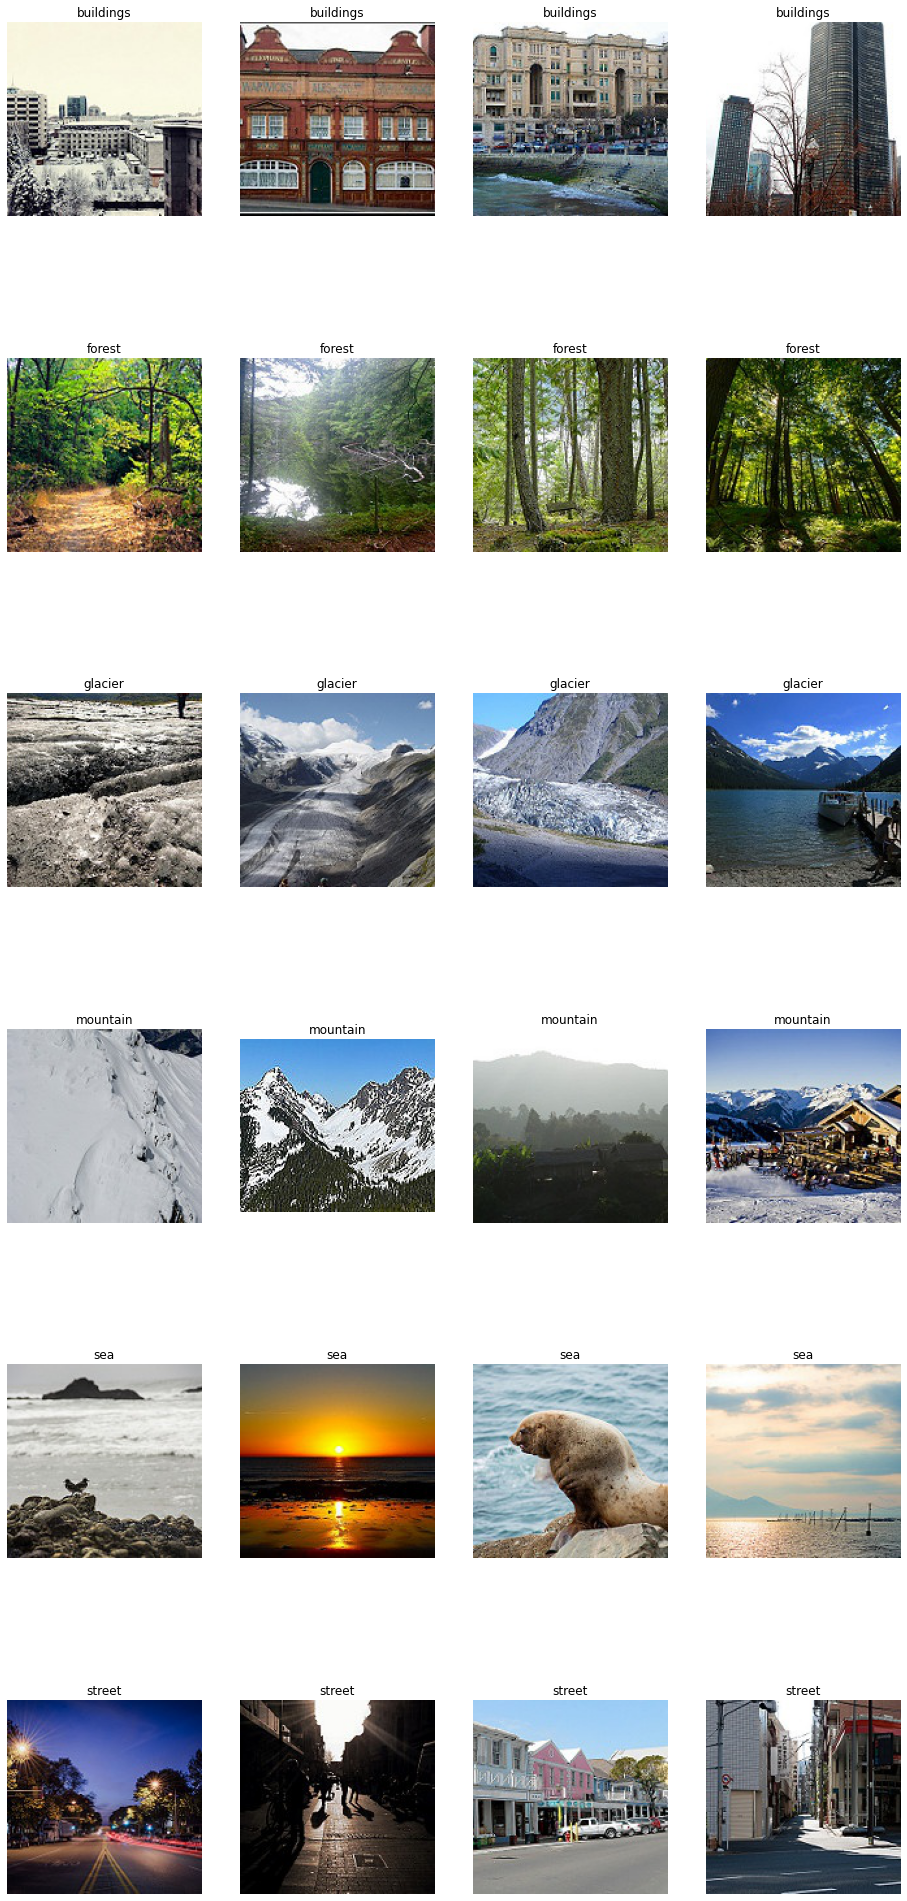

In [2]:
classes=['buildings', 'forest' , 'glacier' , 'mountain', 'sea', 'street']
#Displaying theImages
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#We'll output images in a 6X4 configuration. 

nrows=6
ncols=4

pic_index=0

fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*6)

pic_index+=4

next_a_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[0]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[0]+'/')[pic_index-4:pic_index]]
next_b_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[1]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[1]+'/')[pic_index-4:pic_index]]
next_c_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[2]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[2]+'/')[pic_index-4:pic_index]]
next_d_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[3]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[3]+'/')[pic_index-4:pic_index]]
next_e_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[4]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[4]+'/')[pic_index-4:pic_index]]
next_f_pix = [os.path.join('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[5]+'/' ,fname) for fname in os.listdir('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/'+classes[5]+'/')[pic_index-4:pic_index]]

j=0
for i, img_path in enumerate(next_a_pix+next_b_pix+next_c_pix+next_d_pix+next_e_pix+next_f_pix):
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)

  if i%4==0 and i>=4:
    j=j+1
  sp.title.set_text(classes[j])

  
plt.show()

In [3]:
#Image Generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Add data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,horizontal_flip=True,shear_range=0.2,  
    zoom_range=0.2, validation_split=0.1)


train_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='training'
    
)


validation_generator=train_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_train/seg_train/',
      target_size=(150,150),
      batch_size=64,
      class_mode='sparse',
      seed=2209,
      subset='validation'
    
)

test_datagen = ImageDataGenerator()
test_generator=test_datagen.flow_from_directory(
      '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_test/seg_test/',
      target_size=(150,150),
      batch_size=32,
      class_mode='sparse',
      seed=2209
)




Found 12632 images belonging to 6 classes.
Found 1402 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [4]:
SEED = 2209
import os
import random as rn
import numpy as np
import tensorflow as tf

os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tf.compat.v1.set_random_seed(SEED)
rn.seed(SEED)

In [5]:
from keras.layers import *
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
import numpy as np 
from keras.applications.densenet import DenseNet121
import keras


base_model1=DenseNet121(include_top=False, weights= 'imagenet',  input_shape=(150,150,3), pooling='avg')
base_model1.trainable = False

x = Dense(256, activation='relu')(base_model1.output)
x = Dropout(0.5)(x)
x = Dense(6, activation='softmax')(x)

transfer_model1 = Model(base_model1.input, x) 
transfer_model1.compile(optimizer =keras.optimizers.SGD(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

In [6]:
import tensorflow as tf
reduce = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, mode='auto')
history2 = transfer_model1.fit_generator(
            train_generator,
            epochs=30,
            validation_data=validation_generator,
            callbacks=[reduce],
            verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
198/198 [==============================] - 8194s 41s/step - loss: 2.3025 - accuracy: 0.2111 - val_loss: 1.7182 - val_accuracy: 0.2960
Epoch 2/30
198/198 [==============================] - 875s 4s/step - loss: 1.9850 - accuracy: 0.2674 - val_loss: 1.4927 - val_accuracy: 0.3659
Epoch 3/30
198/198 [==============================] - 877s 4s/step - loss: 1.7714 - accuracy: 0.3245 - val_loss: 1.3295 - val_accuracy: 0.4593
Epoch 4/30
198/198 [==============================] - 879s 4s/step - loss: 1.6116 - accuracy: 0.3761 - val_loss: 1.1896 - val_accuracy: 0.5378
Epoch 5/30
198/198 [==============================] - 873s 4s/step - loss: 1.4617 - accuracy: 0.4305 - val_loss: 1.0935 - val_accuracy: 0.5777
Epoch 6/30
198/198 [==============================] - 875s 4s/step - loss: 1.3395 - accuracy: 0.4753 - val_loss: 0.9993 - val_accuracy: 0.6419
Epoch 7/30
198/198 [==============================] - 866s 4s/st

In [9]:
accuracy1=transfer_model1.evaluate_generator(test_generator, steps=len(test_generator)//32,callbacks=[reduce], verbose=2)
print('Accuracy of the model on the test set: ',accuracy1[1])

2/2 - 4s - loss: 0.4859 - accuracy: 0.8516
Accuracy of the model on the test set:  0.8515625


In [10]:
transfer_model1.save('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/model_DenseNet_256.hd5')

import pandas as pd
df_densenet = pd.DataFrame(history2.history)      
# saving the dataframe  
df_densenet.to_csv('/content/drive/My Drive/Colab Notebooks/DL_Project_Data/DENSENET256_History.csv')  

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/Colab Notebooks/DL_Project_Data/model_DenseNet_256.hd5/assets


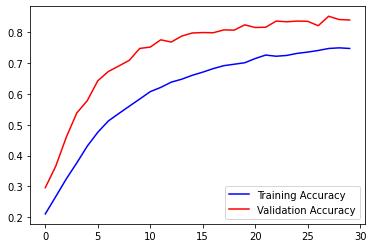

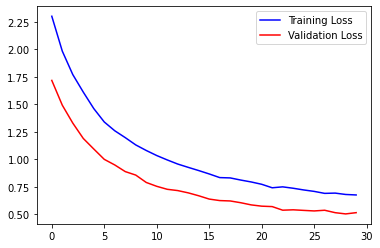

In [11]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history2.history['accuracy']
val_acc=history2.history['val_accuracy']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'b',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

In [21]:
transfer_model1.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 75, 75, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 75, 75, 64)   256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [50]:
img= '/content/drive/My Drive/Colab Notebooks/DL_Project_Data/seg_pred/street.png'

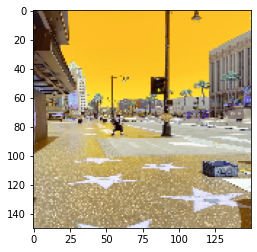

In [51]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img=cv2.imread(img)
img=cv2.resize(img, (150,150))
plt.imshow(img.reshape([150,150,3]))
img = np.reshape(img,[1,150,150,3])

In [52]:
transfer_model1.predict(img).round(2)

array([[1., 0., 0., 0., 0., 0.]], dtype=float32)